Katharina Alefs, Joāo dos Santos Marques DBM2: Data Mining

## Clustering Analysis

In this notebook we describe how we applied some clustering techniques such as K-Means and DBScan and the results we obtained. For that, we used a dataset full of weather parameters by country over some days.

In [1]:
import pandas as pd

Open csv:


In [2]:
weather = pd.read_csv('weather_data.csv',header='infer')
#weather = pd.DataFrame(weather)

The Dataset contains some information that is not usefull for our current purpose such as number of Covid cases per day, the counting of day... By that, we will drop non used columns:

In [3]:
weather = weather.drop(columns=['Province/State','ConfirmedCases', 'Fatalities','day_from_jan_first','ah'], axis = 1)

weather

,Id,Country/Region,Lat,Long,Date,temp,min,max,stp,slp,dewp,rh,wdsp,prcp,fog
0,1,Afghanistan,33.0000,65.0000,2020-01-22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,9.4,0.00,0
1,2,Afghanistan,33.0000,65.0000,2020-01-23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,14.9,99.99,1
2,3,Afghanistan,33.0000,65.0000,2020-01-24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,10.4,0.17,1
3,4,Afghanistan,33.0000,65.0000,2020-01-25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,6.1,0.57,1
4,5,Afghanistan,33.0000,65.0000,2020-01-26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,26378,Zambia,-15.4167,28.2833,2020-03-20,70.6,62.6,81.9,999.9,NaN,62.8,0.761545,6.0,0.00,0
17888,26379,Zambia,-15.4167,28.2833,2020-03-21,71.3,66.2,81.5,999.9,NaN,65.3,0.812047,7.1,99.99,1
17889,26380,Zambia,-15.4167,28.2833,2020-03-22,72.1,67.1,80.4,999.9,NaN,66.7,0.829815,5.0,99.99,1
17890,26381,Zambia,-15.4167,28.2833,2020-03-23,71.7,66.2,80.6,999.9,NaN,62.8,0.733343,4.2,0.00,0


We will rename the name of the columns in order to make the terms more understandable because some parameters used were not so obvious by the way they were named.

In [4]:
weather.columns = ['Id','Place','Lat','Long','Date','mean_temp','min_temp','max_temp','pressure','sea_level','dew_point','humidity','wind_speed','precipitation','fog']

As we want to infer about each country weather conditions, we performed the mean of values measured overall the countries. By that, we get the parameters that expose the weather main characteristiques of each country in the season we have data for (from 22-01-2020 until 24-03-2020).

In [5]:
weather = weather.groupby('Place').mean().reset_index()
weather = weather.drop(columns = 'Id', axis = 1)
data = weather

The units of each column are the following:

temperature: Fahrenheit

pressure: millibars to tenths

sea-level: millibars to tenths

dew_point: degrees Fahrenheit to tenths

wind_speed: knots to tenths

fog: 1 indicates day with fog and 0 a day with no fog


If you want to check all the values, uncomment the following command:

In [6]:
#Display all values
#pd.set_option("display.max_rows", None, "display.max_columns", None)
data

,Place,Lat,Long,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,33.0000,65.0000,33.880952,25.638095,44.050794,814.795238,1017.503175,21.814286,0.626086,5.346032,1.923333,0.746032
1,Albania,41.1533,20.1683,52.180952,43.677778,62.412698,258.896825,1014.968254,40.763492,0.665854,2.131746,0.139841,0.365079
2,Algeria,28.0339,1.6596,69.436508,55.834921,83.044444,999.900000,1017.768254,25.173016,0.193770,10.938095,0.000000,0.000000
3,Andorra,42.5063,1.5218,34.388889,25.139683,47.901587,857.747619,NaN,24.493651,0.685241,2.825397,0.043175,0.000000
4,Antigua and Barbuda,17.0608,-61.7964,77.323810,71.514286,83.246032,14.666667,1017.066667,68.596825,0.744666,7.806349,6.457937,0.507937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,-32.5228,-55.7658,77.207937,64.580952,84.684127,182.653968,1013.394231,61.773016,0.595719,6.392063,1.652540,0.063492
159,Uzbekistan,41.3775,64.5853,44.292063,35.077778,54.558730,880.615873,1020.739683,29.474603,0.599426,6.520635,19.045714,0.190476
160,Venezuela,6.4238,-66.5897,90.574603,77.839683,98.690476,193.195238,1009.707843,68.292063,0.480223,7.868254,0.006190,0.063492
161,Vietnam,16.0000,108.0000,76.611111,70.663492,83.420635,999.900000,NaN,69.241270,0.778671,4.168254,4.783175,0.301587


As the location of the country is not important for our study, we will remove it too.

In [7]:
data = data.drop(columns=['Lat','Long'], axis = 1)

In order to handle missing values, we substitute them by the median value of the column in order for them to not influence too much the final result. There are only missing values on the sea level column.

In [8]:
data = data.fillna(data.sea_level.median())
data

,Place,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,33.880952,25.638095,44.050794,814.795238,1017.503175,21.814286,0.626086,5.346032,1.923333,0.746032
1,Albania,52.180952,43.677778,62.412698,258.896825,1014.968254,40.763492,0.665854,2.131746,0.139841,0.365079
2,Algeria,69.436508,55.834921,83.044444,999.900000,1017.768254,25.173016,0.193770,10.938095,0.000000,0.000000
3,Andorra,34.388889,25.139683,47.901587,857.747619,1014.820523,24.493651,0.685241,2.825397,0.043175,0.000000
4,Antigua and Barbuda,77.323810,71.514286,83.246032,14.666667,1017.066667,68.596825,0.744666,7.806349,6.457937,0.507937
...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,77.207937,64.580952,84.684127,182.653968,1013.394231,61.773016,0.595719,6.392063,1.652540,0.063492
159,Uzbekistan,44.292063,35.077778,54.558730,880.615873,1020.739683,29.474603,0.599426,6.520635,19.045714,0.190476
160,Venezuela,90.574603,77.839683,98.690476,193.195238,1009.707843,68.292063,0.480223,7.868254,0.006190,0.063492
161,Vietnam,76.611111,70.663492,83.420635,999.900000,1014.820523,69.241270,0.778671,4.168254,4.783175,0.301587


In order to check which countries have similar weather conditions, we run some clustering algorithms where the inputs are several weather parameters:


### K - Means method:

K-means is a clustering algorithm that searches for k centroids (k being the number of clusters) that are, at most, at a certain distance from every point inside the cluster. It is very sensitive to parameters of different dimension size and, because of that, we will normalize all the values.

In [9]:
kmeans_data = data

kmeans_data['mean_temp'] = kmeans_data['mean_temp']/kmeans_data['mean_temp'].abs().max()
kmeans_data['min_temp'] = kmeans_data['min_temp']/kmeans_data['min_temp'].abs().max()
kmeans_data['max_temp'] = kmeans_data['max_temp']/kmeans_data['max_temp'].abs().max()
kmeans_data['sea_level'] = kmeans_data['sea_level']/kmeans_data['sea_level'].abs().max()
kmeans_data['pressure'] = kmeans_data['pressure']/kmeans_data['pressure'].abs().max()
kmeans_data['dew_point'] = kmeans_data['dew_point']/kmeans_data['dew_point'].abs().max()
kmeans_data['wind_speed'] = kmeans_data['wind_speed']/kmeans_data['wind_speed'].abs().max()
kmeans_data['precipitation'] = kmeans_data['precipitation']/kmeans_data['precipitation'].abs().max()

kmeans_data

,Place,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,0.374067,0.317253,0.426226,0.814877,0.988637,0.276291,0.626086,0.005347,0.023761,0.746032
1,Albania,0.576110,0.540482,0.603892,0.258923,0.986174,0.516294,0.665854,0.002132,0.001728,0.365079
2,Algeria,0.766622,0.690918,0.803520,1.000000,0.988895,0.318832,0.193770,0.010939,0.000000,0.000000
3,Andorra,0.379675,0.311086,0.463485,0.857833,0.986031,0.310227,0.685241,0.002826,0.000533,0.000000
4,Antigua and Barbuda,0.853703,0.884939,0.805471,0.014668,0.988213,0.868820,0.744666,0.007807,0.079782,0.507937
...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,0.852424,0.799144,0.819385,0.182672,0.984645,0.782393,0.595719,0.006393,0.020416,0.063492
159,Uzbekistan,0.489012,0.434063,0.527899,0.880704,0.991782,0.373314,0.599426,0.006521,0.235294,0.190476
160,Venezuela,1.000000,0.963211,0.954908,0.193215,0.981063,0.864960,0.480223,0.007869,0.000076,0.063492
161,Vietnam,0.845834,0.874411,0.807160,1.000000,0.986031,0.876983,0.778671,0.004169,0.059092,0.301587


In [10]:
from sklearn import cluster

#K-means just work on relevant features
data_cluster = data.drop('Place',axis=1)

# Calculation 6 clusters
k_means = cluster.KMeans(n_clusters=7, max_iter=20, random_state=1)
k_means.fit(data_cluster) 

labels = k_means.labels_
pd.DataFrame(labels, index=data.Place, columns=['Cluster ID'])

,Cluster ID
Place,
Afghanistan,3
Albania,0
Algeria,5
Andorra,3
Antigua and Barbuda,6
...,...
Uruguay,6
Uzbekistan,3
Venezuela,6


We noticed that from 20 iterations the centroids did not change, so we kept just 20 iterations for the algorithm.


In [11]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data_cluster.columns)

,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,0.547314,0.522415,0.552926,0.260593,0.986360,0.509055,0.717774,0.018787,0.023988,0.169101
1,0.867459,0.870621,0.842067,0.971067,0.985013,0.875454,0.736160,0.018500,0.092433,0.358158
2,0.423176,0.391704,0.432313,0.869990,0.984039,0.387204,0.750284,0.009029,0.771836,0.665224
3,0.492566,0.437269,0.524084,0.911718,0.988160,0.423784,0.671790,0.032859,0.040166,0.369696
4,0.196298,0.118275,0.248026,0.663776,0.986818,0.137747,0.754421,0.105030,0.098906,0.419593
5,0.788298,0.726300,0.809112,0.959010,0.985901,0.543477,0.405951,0.074207,0.020563,0.057387
6,0.875312,0.871788,0.852331,0.119322,0.984665,0.819225,0.642722,0.012199,0.048286,0.311875


By the centroids and the class values, we get an idea of how countries have overall similar weather conditions. There are countries like Sweden and Switzerland that, although they are really far from each other, they appear in the same cluster and in reality have a similar weather. Moreover, for example, Venezuela and Uruguai have similar country characteristiques and, by that, similar weather conditions. By that, they are encountered inside the same cluster. Nevertheless, there are some countries that appear on the same cluster and are hard t believe to have the same weather conditions such as Tunisia and United Kingdom.

We defined 5 as the number of clusters since, after some attempts, this number showed some reasonable overall results related to the real weather conditions' similarity between the countries inside the same cluster.

A final note is that before normalizing all the parameters, the wind speed was a super heavy factor in terms of clustering construction since its values were high in absolute value. Normalization made it weight in a more balanced way, balancing also the results.


### DBSCAN and K-Means Method's comparison:

In this section we will compare, visually, the performance of two clustering techniques. For us to be able to check the performance, we will just use two parameters : the mean temperature and the humidity's levels since, from our point of view, they can together describe useful conditions of the weather.

In [12]:
data

,Place,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,0.374067,0.317253,0.426226,0.814877,0.988637,0.276291,0.626086,0.005347,0.023761,0.746032
1,Albania,0.576110,0.540482,0.603892,0.258923,0.986174,0.516294,0.665854,0.002132,0.001728,0.365079
2,Algeria,0.766622,0.690918,0.803520,1.000000,0.988895,0.318832,0.193770,0.010939,0.000000,0.000000
3,Andorra,0.379675,0.311086,0.463485,0.857833,0.986031,0.310227,0.685241,0.002826,0.000533,0.000000
4,Antigua and Barbuda,0.853703,0.884939,0.805471,0.014668,0.988213,0.868820,0.744666,0.007807,0.079782,0.507937
...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,0.852424,0.799144,0.819385,0.182672,0.984645,0.782393,0.595719,0.006393,0.020416,0.063492
159,Uzbekistan,0.489012,0.434063,0.527899,0.880704,0.991782,0.373314,0.599426,0.006521,0.235294,0.190476
160,Venezuela,1.000000,0.963211,0.954908,0.193215,0.981063,0.864960,0.480223,0.007869,0.000076,0.063492
161,Vietnam,0.845834,0.874411,0.807160,1.000000,0.986031,0.876983,0.778671,0.004169,0.059092,0.301587


In [13]:
#Some preprocessing
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import preprocessing

#Get just a 2D dataFrame to enable visualization
data2d = data.drop(['Place','min_temp','max_temp','pressure','sea_level','dew_point','wind_speed','precipitation','fog'],axis=1)
data2d

,mean_temp,humidity
0,0.374067,0.626086
1,0.576110,0.665854
2,0.766622,0.193770
3,0.379675,0.685241
4,0.853703,0.744666
...,...,...
158,0.852424,0.595719
159,0.489012,0.599426
160,1.000000,0.480223
161,0.845834,0.778671


Getting a plot f the points:

<AxesSubplot:xlabel='mean_temp', ylabel='humidity'>

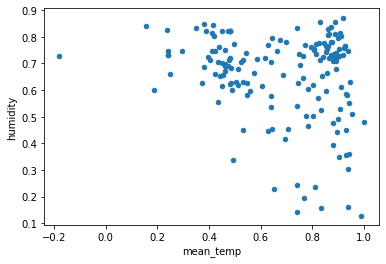

In [14]:
data2d.plot.scatter(x='mean_temp',y='humidity')

Since the dataset is a real case scenario, the clusters are not obviously distributed and there are some points really sparse in the domain.

<AxesSubplot:xlabel='mean_temp', ylabel='humidity'>

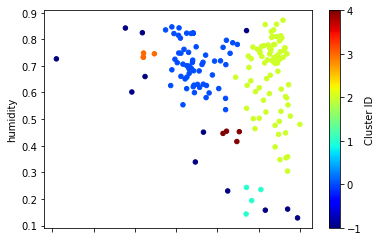

In [15]:
db = DBSCAN(eps=0.065, min_samples=3).fit(data2d)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data2d,labels), axis=1)
result.plot.scatter(x='mean_temp',y='humidity',c='Cluster ID', colormap='jet')

<AxesSubplot:xlabel='mean_temp', ylabel='humidity'>

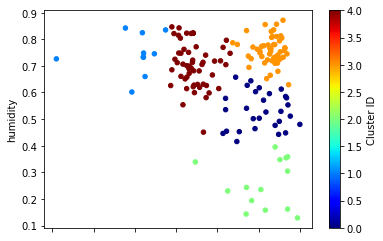

In [16]:
#K-means just work on relevant features
data2d

# Calculation 2 clusters
k_means = cluster.KMeans(n_clusters=5, max_iter=25, random_state=1)
k_means.fit(data2d) 

labels = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result = pd.concat((data2d,labels), axis=1)
result.plot.scatter(x='mean_temp',y='humidity',c='Cluster ID', colormap='jet')